# Práctica 1, Sesión 4: Modelos lineales discriminativos

**Notación:** $\quad\boldsymbol{x}\in\mathbb{R}^D\;$ y $\;y\in\{1,\dotsc,C\}\;$ salvo que se indique otra cosa

**Clasificador discriminativo:** $\;$ modela **posteriors** directamente, sin necesidad de conocer priors y densidades condicionales,
$$p(y=c\mid\boldsymbol{x};\boldsymbol{\theta})=\cdots$$

**Linealidad:** $\;$ en el caso más sencillo, la log-posterior es lineal con $\,\boldsymbol{x},\,$ o, más generalmente, con alguna transformación de $\,\boldsymbol{x},\,\boldsymbol{\phi}(\boldsymbol{x})$

**Ajuste:** $\;$ la minimización de la neg-log-verosimilitud (condicional) suele conducir a estimadores que se calculan con descenso por gradiente

## 1. Regresión logística

**Regresión logística (multiclase):** $\;\mathbf{W}\in\mathbb{R}^{D\times C}$
$$p(y\mid\boldsymbol{x}, \mathbf{W})%
=\operatorname{Cat}(y\mid\boldsymbol{\mu})%
\qquad\text{con}\qquad%
\boldsymbol{\mu}=\operatorname{Cat}(y\mid\mathcal{S}(\boldsymbol{a}))
\qquad\text{y}\qquad%
\boldsymbol{a}=f(\boldsymbol{x};\boldsymbol{\theta})=\mathbf{W}^t\boldsymbol{x}$$

**NLL:**
$$\operatorname{NLL}(\mathbf{W})%
=\frac{1}{N}\sum_{n=1}^N-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)
\qquad\text{con}\qquad%
\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)%
\qquad\text{y}\qquad%
\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$$

**Descenso por gradiente:** $\;$ a partir de un punto de inicio, $\,\mathbf{W}_0=\mathbf{0},\,$ ejecuta la siguiente actualización para $\,i=0,1,\dotsc$
$$\mathbf{W}_{i+1}=\mathbf{W}_i-\eta_i\frac{\partial\operatorname{NLL}}{\partial\mathbf{W}^t}\biggr\vert_{\mathbf{W}_i}\qquad\text{con}\qquad\frac{\partial\operatorname{NLL}}{\partial\mathbf{W}^t}=\frac{1}{N}\sum_{n=1}^N\boldsymbol{x}_n(\boldsymbol{\mu}_n-\boldsymbol{y}_n)^t$$

**LogisticRegression:** $\;$ implementación de regresión logística en sklearn (vista en SIN)
* `solver`: $\;$ escoge algoritmos de optimización (lbfgs por omisión)
* `tol`: $\;$ establece un umbral de tolerancia para acabar el entrenamiento (1e4 por omisión)
* `C`: $\;$ parámetro no negativo de des-regularización (1 por omisión; próximo a cero máxima regularización)
* `max_iter`: $\;$ regularización mediante terminación temprana (100 por omisión)

**GridSearchCV:** $\;$ herramienta sklearn para ajustar hiper-parámetros mediante exploración en rejilla y validación cruzada
* `estimator`: $\;$ clasificador a ajustar; LogisticRegression() en nuestro caso
* `param_grid`: $\;$ diccionario de nombres de parámetros con list de valores a explorar
* `scoring`: $\;$ medida de rendimiento
* `refit`: $\;$ `True` (valor por omisión) para reajustar el clasificador con todos los datos y valores óptimos de hiper-parámetros
* `cv`: $\;$ número de bloques de la validación cruzada (5 por omisión)

**Ejemplo:** $\;$ aplicación de regresión logística a iris con ajuste de hiper-parámetros mediante GridSearchCV

In [1]:
%%timeit -n1 -r1
import warnings; warnings.filterwarnings('ignore'); from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression; X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
G = {"solver": ["lbfgs", "liblinear"], "tol": [1e-5, 1e-4, 1e-3], "C": [.1, 1, 10], "max_iter": [10, 100, 1000]}
GS = GridSearchCV(LogisticRegression(random_state=23), G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

Precisión: 96.7% con {'C': 10, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 1e-05}
1.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Ejercicio:** $\;$ aplica regresión logística a digits y olivetti con ajuste de hiper-parámetros mediante GridSearchCV

**Solución:**

In [2]:
%%timeit -n1 -r1
import warnings; warnings.filterwarnings('ignore'); from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression; X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
G = {"solver": ["lbfgs", "liblinear"], "tol": [1e-5, 1e-4, 1e-3], "C": [.1, 1, 10], "max_iter": [10, 100, 1000]}
GS = GridSearchCV(LogisticRegression(random_state=23), G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

Precisión: 96.1% con {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs', 'tol': 1e-05}
41.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [3]:
%%timeit -n1 -r1
import warnings; warnings.filterwarnings('ignore'); from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression; X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
G = {"solver": ["lbfgs", "liblinear"], "tol": [1e-5, 1e-4, 1e-3], "C": [.1, 1, 10], "max_iter": [100]}
GS = GridSearchCV(LogisticRegression(random_state=23), G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

Precisión: 98.8% con {'C': 10, 'max_iter': 100, 'solver': 'liblinear', 'tol': 1e-05}
5min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 2. Ingeniería de características

**Propósito:** $\;$ encontrar alguna transformación de los datos, $\,\boldsymbol{x},\,\boldsymbol{\phi}(\boldsymbol{x}),\,$ que linearice un problema de clasificación con clases (datos) no linealmente separables

**PolynomialFeatures:** $\;$ añade características polinómicas hasta un grado dado (2 por omisión)

**Ejemplo:** $\;$ regresión logística aplicada a una tarea sintética con clases no linealmente separables, sin y con ingeniería de características

In [4]:
from sklearn.model_selection import train_test_split; from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures; from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, factor=0.2, noise=0.2, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=23)
clf = LogisticRegression(random_state=23).fit(X_train, y_train); acc = clf.score(X_test, y_test)
clfp = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression(random_state=23))
clfp.fit(X_train, y_train); accp = clfp.score(X_test, y_test)
print(f'Precisión: {acc:.1%}, con características polinómicas {accp:.1%}');

Precisión: 50.4%, con características polinómicas 99.2%


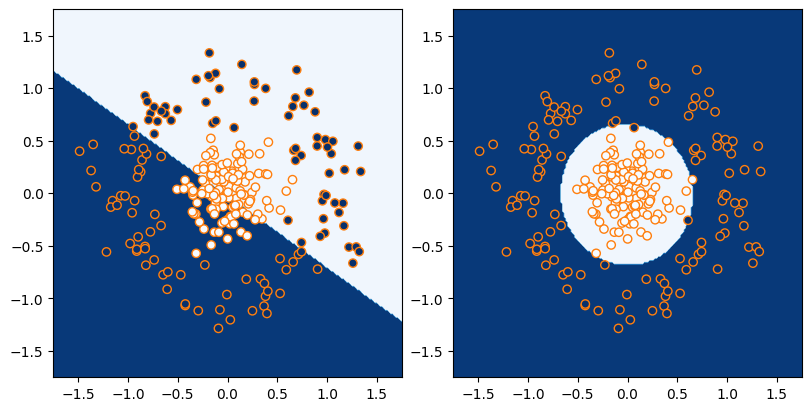

In [5]:
import numpy as np; import matplotlib.pyplot as plt
R = np.linspace(-1.75, 1.75, 200); X1, X2 = np.meshgrid(R, R); X = np.c_[np.ravel(X1), np.ravel(X2)]
fig, (ax, axp) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
ax.contourf(X1, X2, clf.predict(X).reshape(X1.shape), 15, cmap='Blues_r')
ax.scatter(*X_test.T, c=y_test, cmap='Blues_r', edgecolors='C1')
axp.contourf(X1, X2, clfp.predict(X).reshape(X1.shape), 15, cmap='Blues_r')
axp.scatter(*X_test.T, c=y_test, cmap='Blues_r', edgecolors='C1');

**Ejercicio:** $\;$ aplica regresión logística a digits y olivetti con ingeniería de características y ajuste de hiper-parámetros mediante exploración en rejilla

**Solución:**

In [6]:
%%timeit -n1 -r1
from sklearn.model_selection import train_test_split, GridSearchCV; from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures; from sklearn.decomposition import PCA;
from sklearn.pipeline import Pipeline; from sklearn.datasets import load_digits; X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
scaler = StandardScaler(); poly = PolynomialFeatures(); pca = PCA(); logreg = LogisticRegression()
pipe = Pipeline(steps=[("scaler", scaler), ("poly", poly), ("pca", pca), ("logreg", logreg)])
G = {"pca__n_components": [32, 64], "logreg__solver": ["lbfgs", "liblinear"], "poly__degree": [2],
     "logreg__tol": [1e-5, 1e-4, 1e-3], "logreg__C": [.1, 1, 10]}
GS = GridSearchCV(pipe, G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

Precisión: 95.0% con {'logreg__C': 10, 'logreg__solver': 'liblinear', 'logreg__tol': 1e-05, 'pca__n_components': 64, 'poly__degree': 2}
2min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [2]:
%%timeit -n1 -r1
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV; from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures; from sklearn.decomposition import PCA;
from sklearn.pipeline import Pipeline; from sklearn.datasets import fetch_olivetti_faces
X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
scaler = StandardScaler(); poly = PolynomialFeatures(); pca = PCA(); logreg = LogisticRegression()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("poly", poly), ("logreg", logreg)])
G = {"pca__n_components": [32, 64], "logreg__solver": ["lbfgs", "liblinear"], "poly__degree": [2],
     "logreg__tol": [1e-5, 1e-4, 1e-3], "logreg__C": [.1, 1, 10]}
GS = GridSearchCV(pipe, G, scoring='accuracy', refit=True, cv=5)
acc = GS.fit(X_train, y_train).score(X_test, y_test)
print(f'Precisión: {acc:.1%} con {GS.best_params_}')

Precisión: 97.5% con {'logreg__C': 1, 'logreg__solver': 'liblinear', 'logreg__tol': 1e-05, 'pca__n_components': 64, 'poly__degree': 2}
4min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
